In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('/Users/Mowafak/Downloads/Current_Employee_Names__Salaries__and_Position_Titles.csv')

In [3]:
data.shape

(32658, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32658 entries, 0 to 32657
Data columns (total 8 columns):
Name                 32658 non-null object
Job Titles           32658 non-null object
Department           32658 non-null object
Full or Part-Time    32658 non-null object
Salary or Hourly     32658 non-null object
Typical Hours        7883 non-null float64
Annual Salary        24775 non-null object
Hourly Rate          7883 non-null object
dtypes: float64(1), object(7)
memory usage: 2.0+ MB


In [5]:
data.head(5)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ALLISON, PAUL W",LIEUTENANT,FIRE,F,Salary,NaN,$107790.00,NaN
1,"BRUNO, KEVIN D",SERGEANT,POLICE,F,Salary,NaN,$104628.00,NaN
2,"COOPER, JOHN E",LIEUTENANT-EMT,FIRE,F,Salary,NaN,$114324.00,NaN
3,"CRESPO, VILMA I",STAFF ASST,LAW,F,Salary,NaN,$76932.00,NaN
4,"DOLAN, ROBERT J",SERGEANT,POLICE,F,Salary,NaN,$111474.00,NaN


In [6]:
print ('Number of Employees who work for the city of Chicago is :',data['Name'].count())

Number of Employees who work for the city of Chicago is : 32658


## Which department hires the highest number of employees?

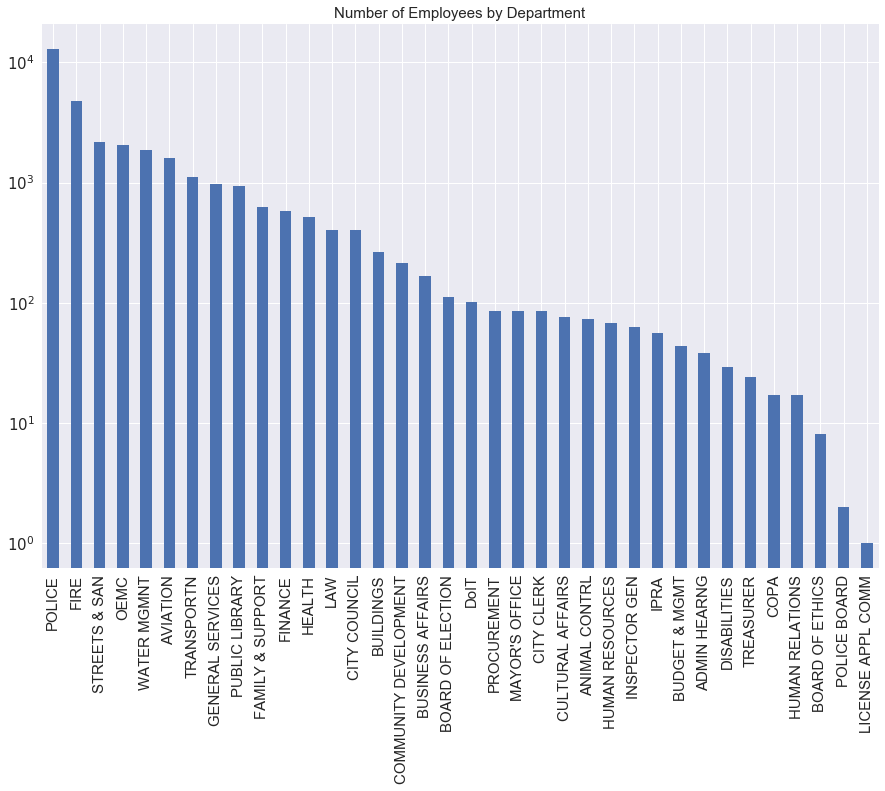

In [7]:
plt.figure(figsize=(15,10))

data['Department'].value_counts().plot(kind='bar',fontsize=15,logy=True)

plt.title('Number of Employees by Department',fontsize=15)

In [8]:
data.head(5)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ALLISON, PAUL W",LIEUTENANT,FIRE,F,Salary,NaN,$107790.00,NaN
1,"BRUNO, KEVIN D",SERGEANT,POLICE,F,Salary,NaN,$104628.00,NaN
2,"COOPER, JOHN E",LIEUTENANT-EMT,FIRE,F,Salary,NaN,$114324.00,NaN
3,"CRESPO, VILMA I",STAFF ASST,LAW,F,Salary,NaN,$76932.00,NaN
4,"DOLAN, ROBERT J",SERGEANT,POLICE,F,Salary,NaN,$111474.00,NaN


## How many employees are paid hourly vs. salary?

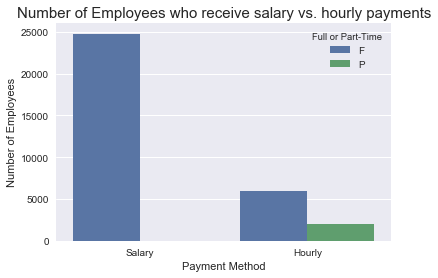

In [9]:
sns.countplot(x='Salary or Hourly',hue='Full or Part-Time',data=data)
plt.title('Number of Employees who receive salary vs. hourly payments',fontsize=15)
plt.ylabel('Number of Employees')
plt.xlabel('Payment Method')

- Most of those who receive salaries are Full-Time employees. 
- There is a few number of employees who work as part-time and get paid hourly.

## Who works as a part-timer in the city of Chicago?

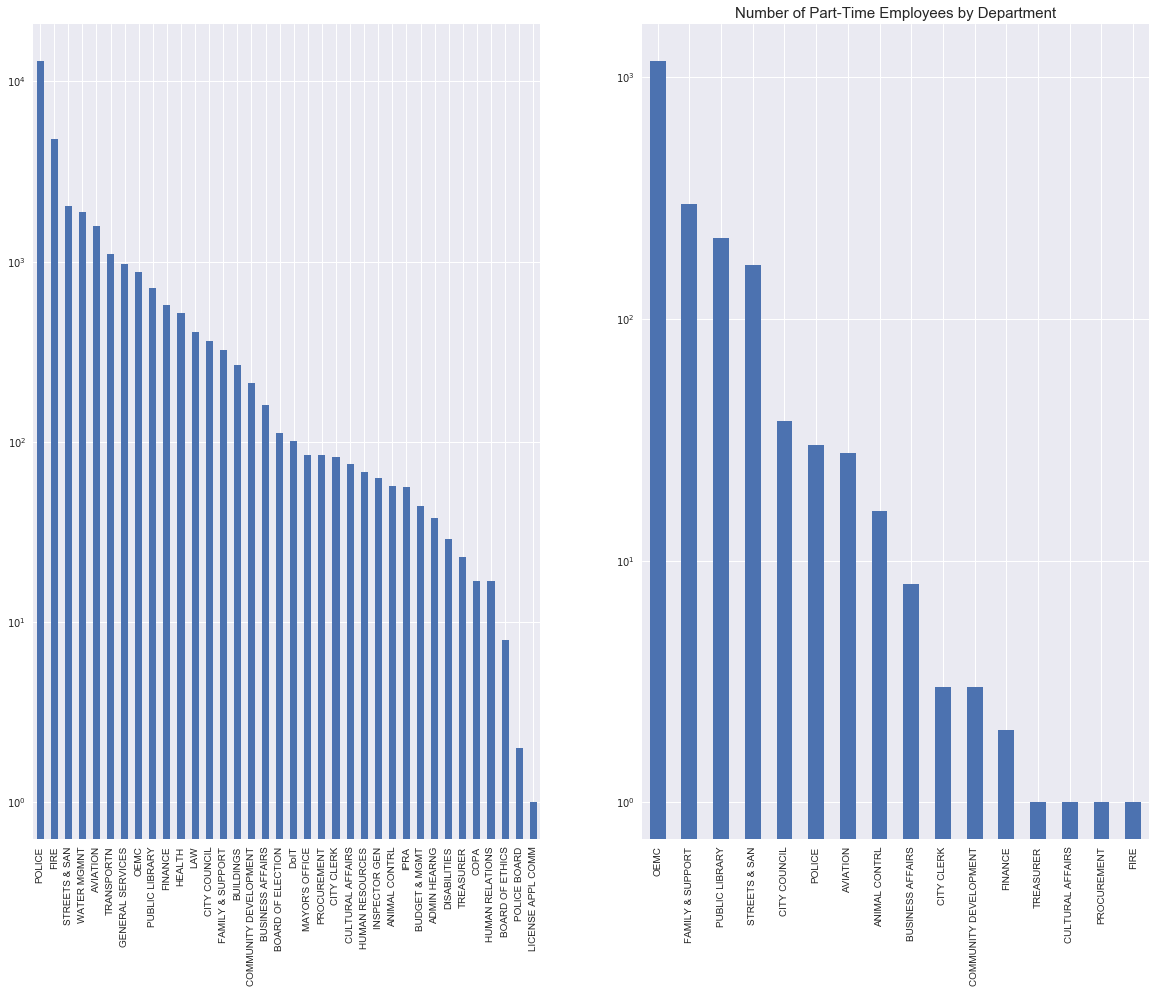

In [22]:
fig, axs = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [20,15]
fullTime = data[data['Full or Part-Time']=='F']['Department'].value_counts()
partTime = data[data['Full or Part-Time']=='P']['Department'].value_counts()
fullTime.plot(kind='bar',ax=axs[0],logy=True)
plt.title('Number of Part-Time Employees by Department',fontsize=15)
partTime.plot(kind='bar',ax=axs[1],logy=True)
plt.title('Number of Part-Time Employees by Department',fontsize=15)

- most part-time employees work in the Emergency management and communication department
- police department is the major recruiter of full-time employees

## The distribution of annual salary across all departments in the city of Chicago

In [11]:
if(data['Annual Salary'].isnull().any()):
    data['Annual Salary'].replace(np.nan,0,inplace=False)


In [12]:
cleanSalary = data['Annual Salary'].dropna(axis=0)

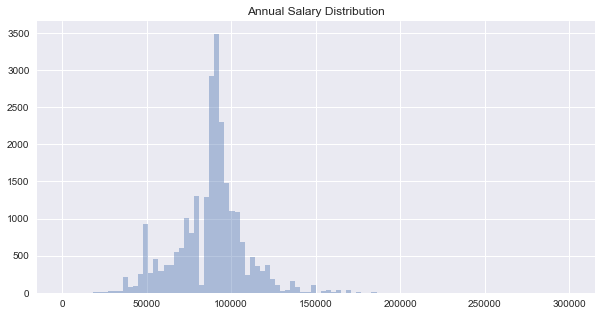

In [13]:
fig = plt.figure(figsize=(10,5))
salary = [float(str(sal).replace('$','')) for sal in cleanSalary]

sns.distplot(salary,kde=False,bins=100)
plt.title ('Annual Salary Distribution')

salaries fall in the range of aproximately 70K-100K

## How much money do employees in the police department make?

In [14]:
CPD_salaries = data[data['Department']=='POLICE'][['Job Titles','Department','Full or Part-Time','Annual Salary']]
CPD_salaries.shape

(12973, 4)

In [15]:
CPD_salaries.dropna(axis=0)
CPD_salaries.shape

(12973, 4)

In [16]:
CPD_salaries.columns

Index(['Job Titles', 'Department', 'Full or Part-Time', 'Annual Salary'], dtype='object')

In [17]:
CPD_salaries['Annual Salary'] = [float(str(sal).replace('$','')) for sal in CPD_salaries['Annual Salary']]

In [18]:
byRole = CPD_salaries.groupby('Job Titles')['Annual Salary'].median()
byRole=pd.DataFrame(byRole).reset_index(inplace=False)
byRole.columns = ['Job Titles','Median Annual Salary']
byRole

,Job Titles,Median Annual Salary
0,ACCOUNTANT I,76548.0
1,ACCOUNTANT II,65448.0
2,ACCOUNTANT III,72264.0
3,ACCOUNTING TECHNICIAN II,76932.0
4,ADMIN SERVICES OFFICER I-EXCLUDED,68556.0
5,ADMINISTRATIVE ASST II,70092.0
6,ADMINISTRATIVE ASST III,84420.0
7,ADMINISTRATIVE MANAGER,93300.0
8,ADMINISTRATIVE SERVICES OFFICER I,80568.0
9,ADMINISTRATIVE SERVICES OFFICER II,88344.0


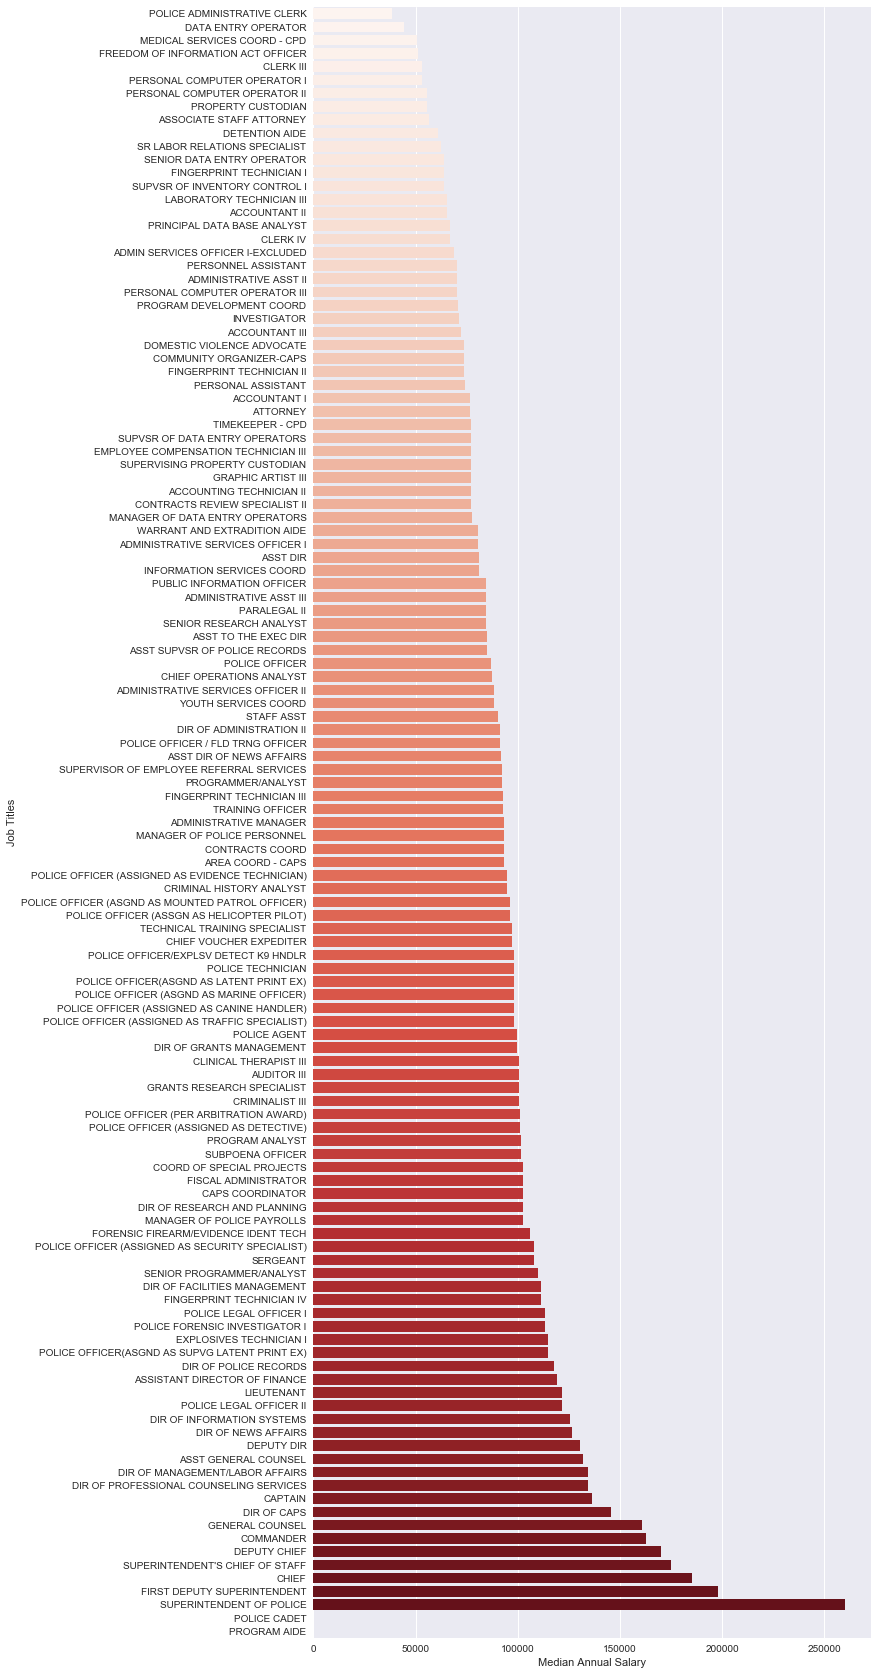

In [21]:
plt.figure(figsize=(10,30))
sns.barplot(x='Median Annual Salary',y='Job Titles',data=byRole.sort_values(by='Median Annual Salary',ascending=True),palette='Reds')
plt.xlabel('Median Annual Salary')

## How much money do police officers in Chicago make?

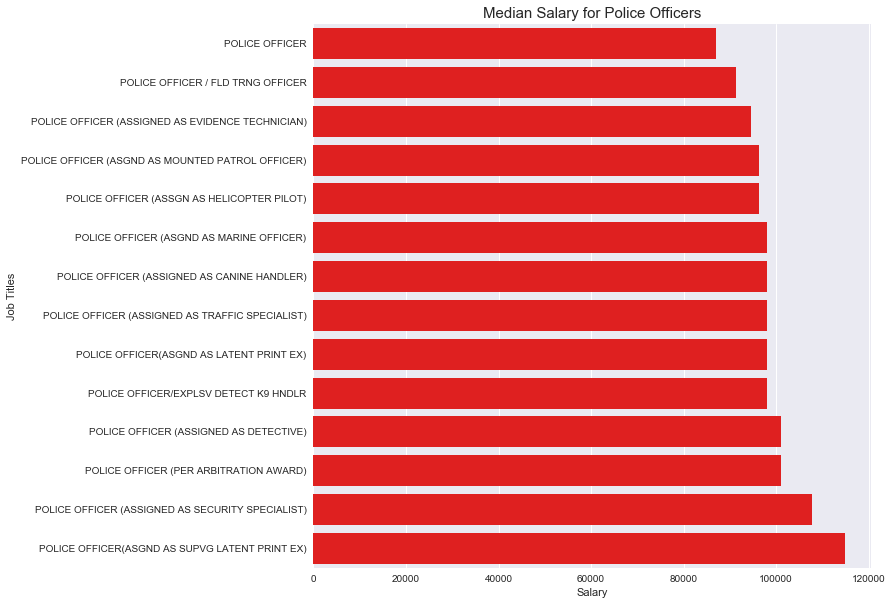

In [20]:
plt.figure(figsize=(10,10))
sns.barplot(x='Median Annual Salary',y='Job Titles', data= byRole[byRole['Job Titles'].str.contains('POLICE OFFICER')].sort_values(by='Median Annual Salary'),color='red')
plt.xlabel('Salary')
plt.title('Median Salary for Police Officers',fontsize=15)